# Ejemplo de análisis exploratorio

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Abril de 2025
**Versión:** 1.0  

---

## Descripción

En este notebook se entrega un ejemplo de análisis exploratorio sobre un conjunto de datos de resolucion de casos de un call center.

Se calculan medidas estadísticas, se analizan distribuciones y correlaciones, además de descrubir algunos insights (que se definen como conocimieto relevante y significativo para el negocio)

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- pandas (2.2.2)
- matplotlib (3.7.1)
- seaborn (0.13.2)
- scipy (1.14.1)


Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:

```bash
import numpy
print(numpy.__version__)
````

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/call_center_data.csv

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [22]:
data = pd.read_csv("call_center_data.csv")
data.head()

,ID_Empleado,Turno,Experiencia,Nivel_Educativo,Tiempo_Resolución_Min,Casos_Resueltos,Tipo_Caso,Satisfacción_Cliente,Capacitaciones_Anuales
0,1,Noche,4.4,Técnico,35.0,89,Cuenta,3.0,5.2
1,2,Mañana,2.3,Técnico,21.0,73,Software,NaN,1.0
2,3,Noche,2.0,Universitario,37.3,89,Hardware,5.0,1.4
3,4,Noche,1.2,Básico,28.7,79,Software,5.0,2.6
4,5,Mañana,6.3,Básico,25.1,84,Software,NaN,3.2


## Cantidad observaciones y características

In [23]:
data.shape

(10000, 9)

---
✅ **Interpretación**

---

+ Existen 10.000 empleados
+ De cada empleado se tienen 9 características

## Selección de características a analizar

Se descartan las características que carecen de poder analítico

In [25]:
data_final = data.drop("ID_Empleado", axis=1)
data_final.head()

,Turno,Experiencia,Nivel_Educativo,Tiempo_Resolución_Min,Casos_Resueltos,Tipo_Caso,Satisfacción_Cliente,Capacitaciones_Anuales
0,Noche,4.4,Técnico,35.0,89,Cuenta,3.0,5.2
1,Mañana,2.3,Técnico,21.0,73,Software,NaN,1.0
2,Noche,2.0,Universitario,37.3,89,Hardware,5.0,1.4
3,Noche,1.2,Básico,28.7,79,Software,5.0,2.6
4,Mañana,6.3,Básico,25.1,84,Software,NaN,3.2


## Análisis de nulos

In [26]:
pd.DataFrame(data_final.isnull().sum(), columns=["Cantidad nulos"]).T

,Turno,Experiencia,Nivel_Educativo,Tiempo_Resolución_Min,Casos_Resueltos,Tipo_Caso,Satisfacción_Cliente,Capacitaciones_Anuales
Cantidad nulos,0,100,0,0,0,0,996,0


---
✅ **Interpretación**

---

+ Se distinguen 2 características que contienen nulos: la experiencia y el nivel de satisfacción del cliente

In [28]:
# Estadísticas generales
data_final.describe()

,Experiencia,Tiempo_Resolución_Min,Casos_Resueltos,Satisfacción_Cliente,Capacitaciones_Anuales
count,9900.000000,10000.000000,10000.000000,9004.000000,10000.000000
mean,5.005727,29.972430,80.166500,3.008996,3.023700
std,2.000362,9.934804,9.026933,1.152788,1.146599
min,-2.400000,-14.700000,47.000000,1.000000,-1.100000
25%,3.700000,23.300000,74.000000,2.000000,2.300000
50%,5.000000,29.900000,80.000000,3.000000,3.000000
75%,6.400000,36.500000,86.000000,4.000000,3.700000
max,11.800000,66.400000,112.000000,5.000000,23.400000


---
✅ **Interpretación**

---
**1. Experiencia de los empleados**

+ Una importante concentración de los empleados tiene una experiencia dentro del intervalo [3 ; 7] años [$\mu - \sigma; \mu + \sigma$].

+ El 75% de los empleados tiene una experiencia igual o inferior a 6,4 años.

+ El 25% de los empleados tiene una experiencia igual o inferior a 3,7 años.

**2. Tiempo de resolución (minutos)**

+ Una importante concentración de las empleados tiene un tiempo de resolución de sus casos dentro del intervalo [20 ; 38] minutos [$\mu - \sigma; \mu + \sigma$].
+ El 75% de los empleados presenta un tiempo de resolución de sus casos igual o inferior a 36,5 minutos.




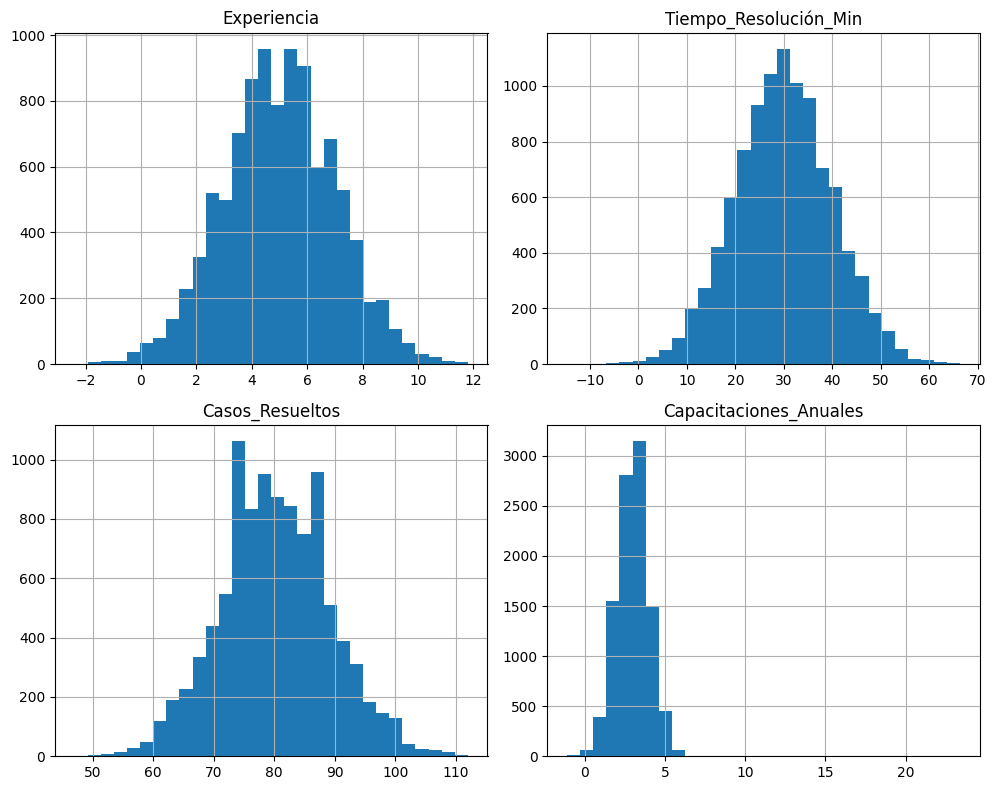

In [29]:
# Distribución de variables numéricas
data_final[['Experiencia', 'Tiempo_Resolución_Min', 'Casos_Resueltos', 'Capacitaciones_Anuales']].hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

---
✅ **Interpretación**

---

1. **Experiencia**:
   - La distribución es aproximadamente normal.
   - La mayoría de los valores se concentran entre 3 y 7 años.
   - Hay pocos valores negativos, lo cual puede indicar datos erróneos o una métrica que permite valores por debajo de 0.

2. **Tiempo resolución en minutos**:
   - También sigue una distribución normal.
   - La mayoría de los casos se resuelven entre 20 y 40 minutos.
   - Hay algunos valores negativos, lo que puede indicar problemas en la recolección de datos.

3. **Casos resueltos**:
   - La distribución tiene múltiples extremos, lo que sugiere diferentes grupos de desempeño entre los empleados.
   - Los valores se concentran entre 65 y 90 casos resueltos.
   - Presenta una distribución multimodal, lo que podría indicar diferentes niveles de productividad entre los empleados.

4. **Capacitaciones anuales**:
   - La distribución está muy sesgada a la derecha, es decir, es asimétrica.
   - La mayoría de los empleados han recibido entre 2 y 5 capacitaciones anuales.
   - Hay pocos casos con más de 5 capacitaciones.

**Conclusiones Generales**
- La mayoría de las variables tienen una distribución normal, excepto **Capacitaciones Anuales**, que es asimétrica.
- Se deben revisar los valores negativos en **Experiencia** y **Tiempo resolución**, ya que podrían indicar errores en la recolección de datos.

## Detección de atípicos

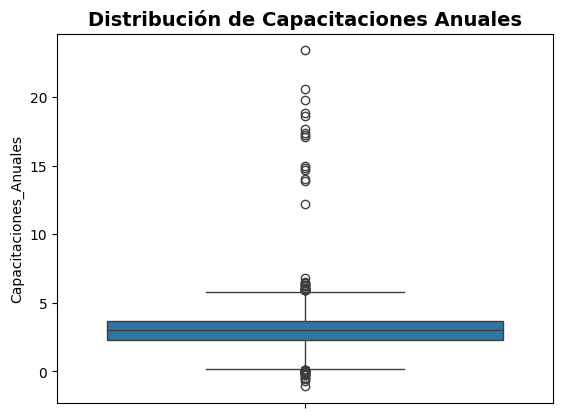

In [31]:
sns.boxplot(y='Capacitaciones_Anuales', data=data_final)
plt.title("Distribución de Capacitaciones Anuales", fontsize=14, fontweight="bold")
plt.show()

In [33]:
# Calcula y muestra el intervalo exacto de la mayor concentración
mean, std = np.mean(data_final.Capacitaciones_Anuales), np.std(data_final.Capacitaciones_Anuales)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Límite inferior {0:.1f} - Límite superior : {1:.1f}".format(lim_inf, lim_sup))

Límite inferior 0.7 - Límite superior : 5.3


---
✅ **Interpretación**

---

+ Se detecta la presencia de atípicos que se reconocen como los valores que se encuentran por sobre el límite superior y por debajo del líite inferior.


## Insights

### Insight 1 - ¿Existe diferencia en la distribución de los tiempos de reseolución entre los distintos turnos?

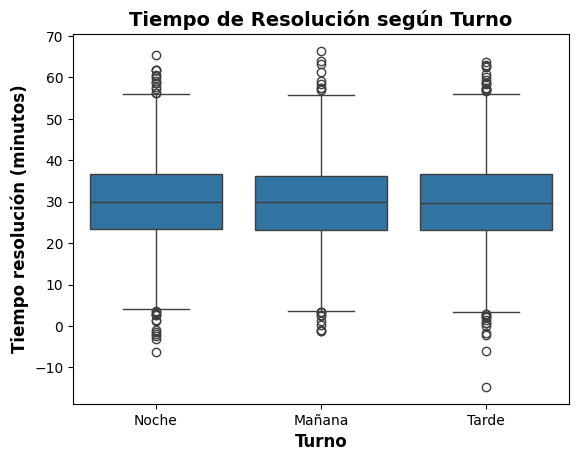

In [36]:
# Comparación categóricas vs numéricas
sns.boxplot(x='Turno', y='Tiempo_Resolución_Min', data=data_final)
plt.title("Tiempo de Resolución según Turno", fontsize=14, fontweight="bold")
plt.xlabel("Turno", fontsize=12, fontweight="bold")
plt.ylabel("Tiempo resolución (minutos)", fontsize=12, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---

+ Existe similitud en la distribución del tiempo de resolución entre los distintos turnos.

### Insight 2 : Cuál es la distribución de la **satisfacción del cliente** según el **tipo de caso** en el call center

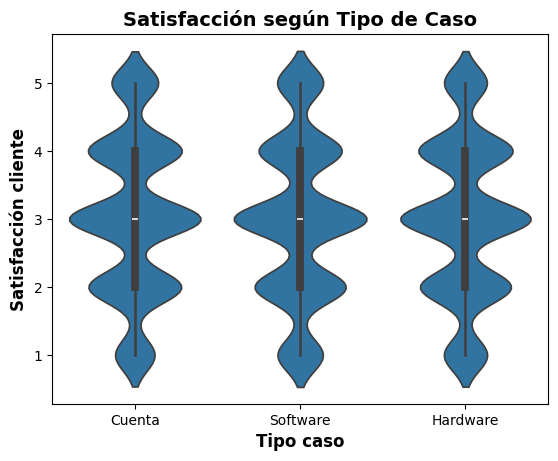

In [78]:
# Satisfacción vs tipo de caso
sns.violinplot(x='Tipo_Caso', y='Satisfacción_Cliente', data=data_final)
plt.title("Satisfacción según Tipo de Caso", fontsize=14, fontweight="bold")
plt.xlabel("Tipo caso", fontsize=12, fontweight="bold")
plt.ylabel("Satisfacción cliente", fontsize=12, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---

1. **Distribución similar entre categorías**  
   - Todas las categorías tienen una distribución casi idéntica, lo que sugiere que el tipo de caso no influye significativamente en la satisfacción del cliente.

2. **Satisfacción bien distribuida en todos los niveles**  
   - Se observan valores en toda la escala (1 a 5), lo que indica que hay clientes muy satisfechos y otros insatisfechos en todos los tipos de casos.

3. **Presencia de múltiples modos**  
   - Se pueden ver varios puntos de concentración a lo largo del eje de satisfacción (extremos en 1, 2, 3, 4 y 5). Esto sugiere que los clientes tienden a calificar con valores enteros específicos en lugar de distribuirse uniformemente.

4. **Simetría en la distribución**  
   - La distribución en cada tipo de caso parece ser bastante simétrica, lo que implica que los niveles de satisfacción tienen un comportamiento consistente sin un sesgo claro hacia calificaciones bajas o altas.

5. **Importancia de otros factores**  
   - Dado que el tipo de caso no parece afectar de manera significativa la satisfacción, otros factores como el **tiempo de resolución, el turno del agente o la experiencia del empleado** podrían ser más relevantes para explicar la satisfacción del cliente.


### Insight 3: ¿Cuál es la relación entre el tiempo de resolución (en minutos) y la satisfacción del cliente?

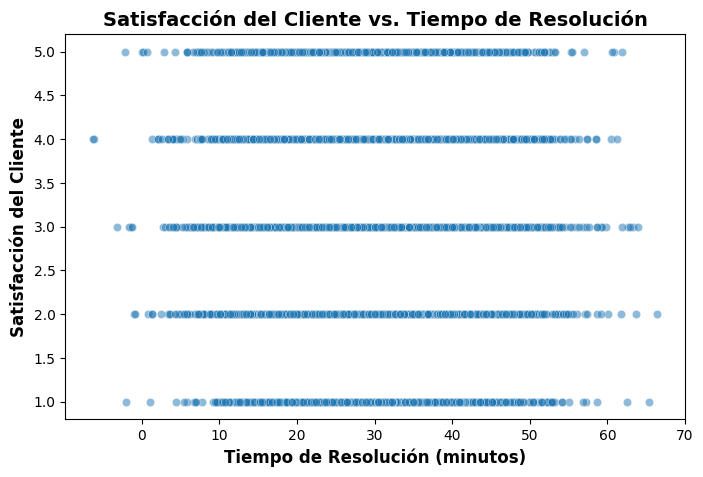

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_final["Tiempo_Resolución_Min"], y=data_final["Satisfacción_Cliente"], alpha=0.5)
plt.title("Satisfacción del Cliente vs. Tiempo de Resolución", fontsize=14, fontweight="bold")
plt.xlabel("Tiempo de Resolución (minutos)", fontsize=12, fontweight="bold")
plt.ylabel("Satisfacción del Cliente", fontsize=12, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---

+ No hay una tendencia clara entre tiempo de resolución y satisfacción

+ Los puntos están dispersos de manera horizontal sin una pendiente clara, lo que sugiere que el tiempo de resolución no tiene una relación directa con la satisfacción del cliente.

+ Los clientes tienden a calificar con valores enteros

+ Satisfacción alta (5) y baja (1) pueden ocurrir en cualquier tiempo de resolución

+ Hay casos con tiempos de resolución largos (50-60 min) que aún tienen calificación 5, lo que indica que algunos clientes valoran otros factores además del tiempo.

+ Igualmente, hay clientes insatisfechos (calificación 1) con tiempos de resolución cortos, lo que sugiere que la calidad del servicio también importa.

+ Algunas calificaciones bajas están más concentradas en tiempos largos

+ Aunque no es una tendencia fuerte, parece haber más calificaciones de 1 y 2 cuando los tiempos de resolución superan los 50 minutos, lo que podría indicar que algunos clientes se molestan cuando el servicio tarda demasiado.

## Análisis de correlación

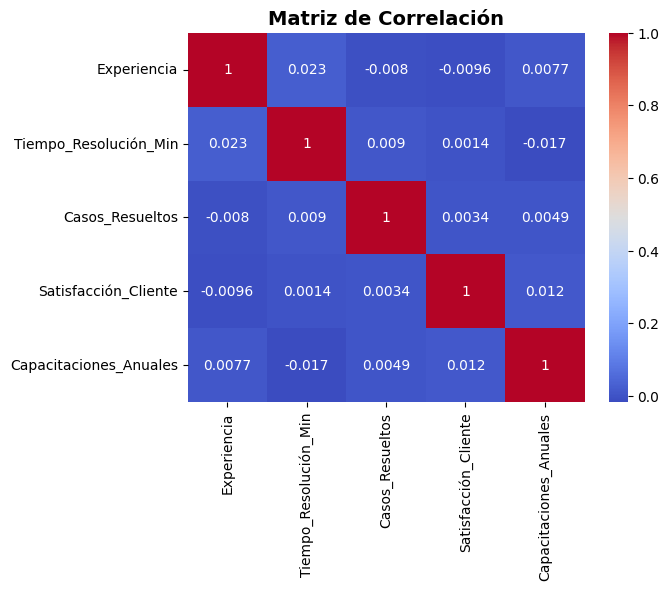

In [38]:
# Correlaciones
correlaciones = data_final.corr(numeric_only=True)
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación", fontsize=14, fontweight="bold")
plt.show()


---
✅ **Interpretación**

---

+ Se aprecian correlaciones débiles (tanto positivas como negativas) del nivel de satisfacción del cliente con las otras variables.
+ Lo anterior hace suponer que la satisfacción del cliente con su atención no guarda una relación fuerte con la experiencia del empleado que lo atiene ni con el tiempo de resolución que toma el caso.

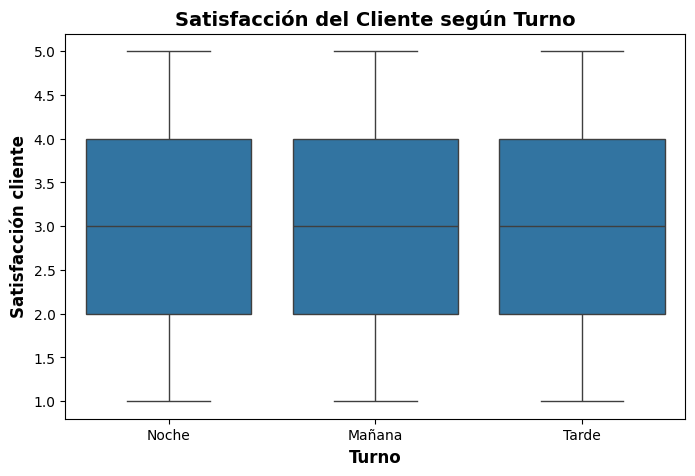

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Turno", y="Satisfacción_Cliente", data=data_final)
plt.title("Satisfacción del Cliente según Turno", fontsize=14, fontweight="bold")
plt.xlabel("Turno", fontsize=12, fontweight="bold")
plt.ylabel("Satisfacción cliente", fontsize=12, fontweight="bold")
plt.show()


---
✅ **Interpretación**

---

+ Se aprecia similitud en las districines de la satisfacción del cliente considerando el turno, es decir, no hay diferencias en la satisfacción del cliente y el momento del día en el que se atiende su caso.

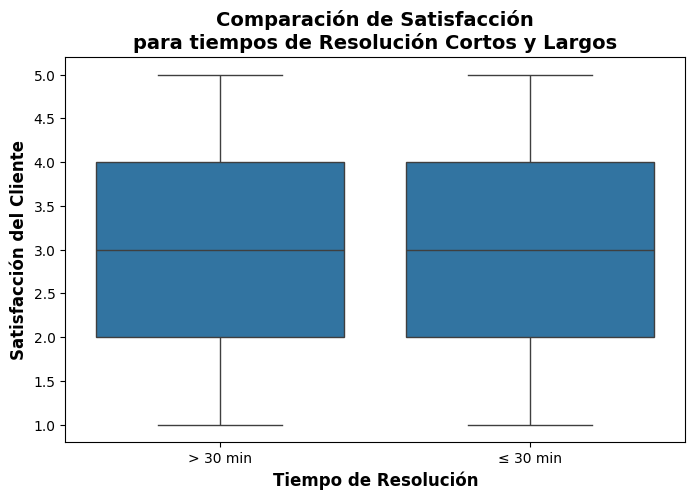

In [75]:
# Definir umbral de 30 minutos
threshold = 30
plt.figure(figsize=(8, 5))
sns.boxplot(x=np.where(data_final["Tiempo_Resolución_Min"] <= threshold, "≤ 30 min", "> 30 min"),
            y=data_final["Satisfacción_Cliente"])
plt.title("Comparación de Satisfacción\npara tiempos de Resolución Cortos y Largos", fontsize=14, fontweight="bold")
plt.xlabel("Tiempo de Resolución", fontsize=12, fontweight="bold")
plt.ylabel("Satisfacción del Cliente", fontsize=12, fontweight="bold")
plt.show()


In [69]:
short_resolution = data_final[data_final["Tiempo_Resolución_Min"] <= threshold]["Satisfacción_Cliente"]
long_resolution = data_final[data_final["Tiempo_Resolución_Min"] > threshold]["Satisfacción_Cliente"]

In [70]:
print("Varianza en tiempos cortos:", np.var(short_resolution))
print("Varianza en tiempos largos:", np.var(long_resolution))

Varianza en tiempos cortos: 1.3280993745676717
Varianza en tiempos largos: 1.3294545678645708


In [71]:
# Elimina los nulos
short_resolution = short_resolution.dropna()
long_resolution = long_resolution.dropna()

In [72]:
# Test de diferencia de medias
t_stat, p_value = stats.ttest_ind(short_resolution, long_resolution, equal_var=False)

print(f"Estadístico t: {t_stat:.4f}, p-valor: {p_value:.4f}")

Estadístico t: -0.1836, p-valor: 0.8544


---
✅ **Interpretación**

---
+ Fue necesario eliminar los valroes nulos que presentaba la columna de satisfacción de cliente.
+ Al hacer la prueba de t-student se concluye que dado que el p-valor es mayor a 0.05, no hay diferencia estadísticamente significativa en la satisfacción del cliente entre tiempos  de resolución cortos y largos, considerando un umbral de 30 minutos.